In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
df = pd.read_csv('./Resources/Cleaned_Datasets/monthly_trip.csv')
df

,startdate,Trip_number
0,2010-09-30,4002
1,2010-10-31,35957
2,2010-11-30,47390
3,2010-12-31,28248
4,2011-01-31,37503
...,...,...
123,2020-12-31,89908
124,2021-01-31,85219
125,2021-02-28,65289
126,2021-03-31,148833


In [3]:
#change start date to date type data
df['startdate'] = pd.to_datetime(df['startdate'])

In [4]:
#Summary statstics of the univeriate variable
df.describe()

,Trip_number
count,128.00000
mean,221843.31250
std,106005.03639
min,0.00000
25%,144676.25000
50%,207259.50000
75%,321636.50000
max,404761.00000


In [5]:
#changing columns name
trip_df=df.rename(columns = {'startdate': 'date','Trip_number': 'trip'})
trip_df

,date,trip
0,2010-09-30,4002
1,2010-10-31,35957
2,2010-11-30,47390
3,2010-12-31,28248
4,2011-01-31,37503
...,...,...
123,2020-12-31,89908
124,2021-01-31,85219
125,2021-02-28,65289
126,2021-03-31,148833


In [6]:
##set date as index
trip_df.set_index('date', inplace=True) 
trip_df.head()

,trip
date,
2010-09-30,4002
2010-10-31,35957
2010-11-30,47390
2010-12-31,28248
2011-01-31,37503


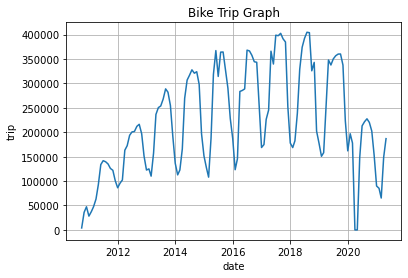

In [7]:
#Visualizing timeseries
plt.xlabel("date")
plt.ylabel("trip")
plt.grid(True)
plt.title("Bike Trip Graph")
plt.plot(trip_df)

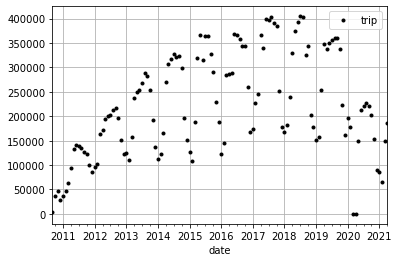

In [8]:
trip_df.plot(style='k.')
plt.grid(True)
plt.show()

<AxesSubplot:ylabel='Density'>

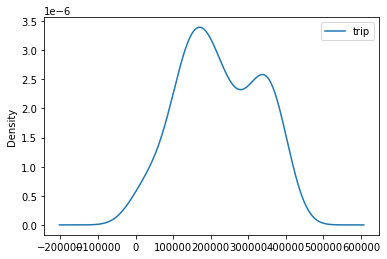

In [9]:
#We can also visualize the data in our series through a distribution too.
trip_df.plot(kind='kde')

In [10]:
DF=trip_df.dropna()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [12]:
decomposition = seasonal_decompose(DF['trip'], period = 48, extrapolate_trend = 4)

In [13]:
Decom_Df = DF
Decom_Df.loc[:, "trend"] = decomposition.trend
Decom_Df.loc[:, "seasonal"] = decomposition.seasonal
Decom_Df.loc[:, "residual"] = decomposition.resid

In [14]:
def plot_decomposition(df,trip,trend,seasonal, residual):

  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

  ax1.plot(df[trip], label = 'Original', c = 'b')
  ax1.legend(loc = 'best')
  ax1.tick_params(axis = 'x', rotation = 45)

  ax2.plot(df[trend], label = 'Trend', c = 'lime')
  ax2.legend(loc = 'best')
  ax2.tick_params(axis = 'x', rotation = 45)

  ax3.plot(df[seasonal],label = 'Seasonality', c = 'm')
  ax3.legend(loc = 'best')
  ax3.tick_params(axis = 'x', rotation = 45)

  ax4.plot(df[residual], label = 'Residuals', c = 'r')
  ax4.legend(loc = 'best')
  ax4.tick_params(axis = 'x', rotation = 45)
  plt.tight_layout()

  plt.subtitle('Signal Decomposition of  %s' %(trip), x =0.5, y= 1.05, fontsize = 18)
  plt.show()

In [15]:
Decom_Df

,trip,trend,seasonal,residual
date,,,,
2010-09-30,4002,77586.154167,19807.640509,-93391.794676
2010-10-31,35957,81382.213542,26243.728356,-71668.941898
2010-11-30,47390,85178.272917,-51755.739352,13967.466435
2010-12-31,28248,88974.332292,-82737.786921,22011.454630
2011-01-31,37503,92770.391667,-97634.146991,42366.755324
...,...,...,...,...
2020-12-31,89908,208716.219792,-100207.450810,-18600.768981
2021-01-31,85219,206485.258333,-99119.140741,-22147.117593
2021-02-28,65289,204254.296875,-93592.073727,-45373.223148


AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

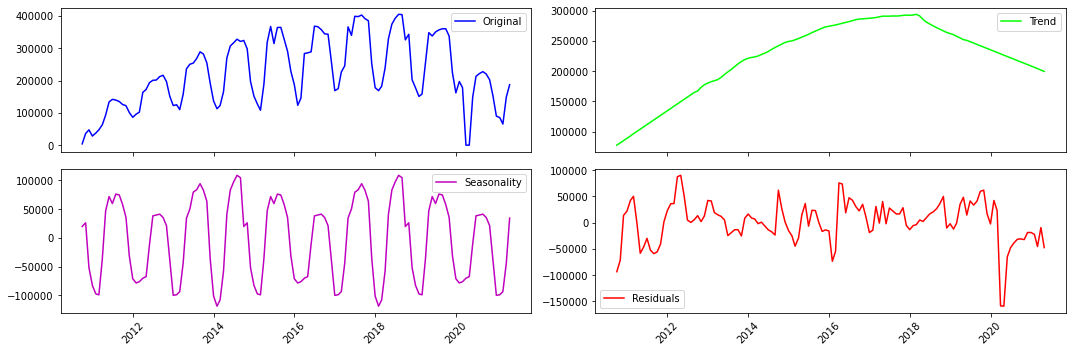

In [16]:

plot_decomposition(Decom_Df, trip= 'trip', trend = 'trend', seasonal = 'seasonal', residual = 'residual')

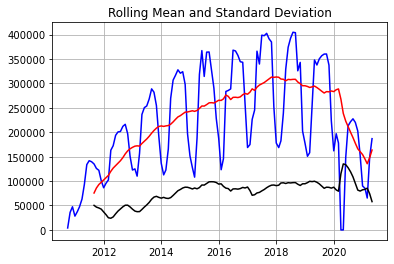

Results of dickey fuller test
Test Statistics                 -2.182752
p-value                          0.212565
No. of lags used                 9.000000
Number of observations used    118.000000
critical value (1%)             -3.487022
critical value (5%)             -2.886363
critical value (10%)            -2.580009
dtype: float64


In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.grid(True)
    #plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['trip'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(trip_df)

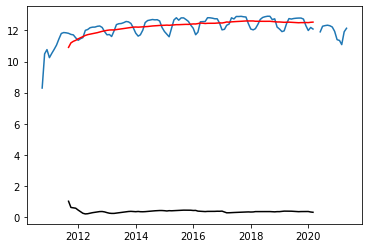

In [18]:
df_log = np.log(trip_df)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

In [21]:
#Perform the Dickey-Fuller test (ADFT
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

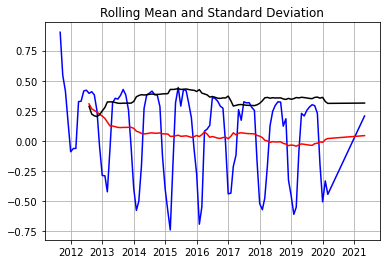

Results of dickey fuller test
Test Statistics                -3.249836
p-value                         0.017275
No. of lags used               12.000000
Number of observations used    91.000000
critical value (1%)            -3.504343
critical value (5%)            -2.893866
critical value (10%)           -2.584015
dtype: float64


In [22]:
test_stationarity(df_log_moving_avg_diff)

#From the above graph, we observed that the data attained stationarity.

In [23]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()

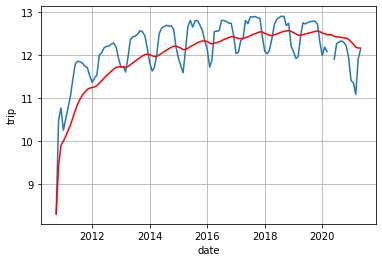

In [24]:
plt.plot(df_log)
plt.plot(weighted_average, color='red')
plt.xlabel("date")
plt.ylabel("trip")
plt.grid(True)
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
#plt.legend()
plt.show(block =False)

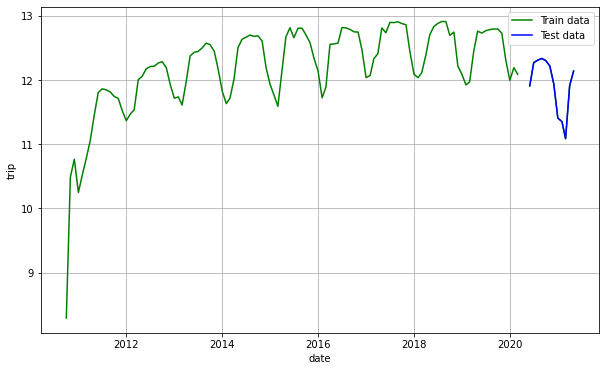

In [25]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('date')
plt.ylabel('trip')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()